In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Initialize variables
set_count=1
record_count=1
city_data = []

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a set of random latitude and longitude combinations. Zip pairs up lats and lngs in pairs in the same index in their respective array into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | wageningen
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | aleksandrov gay
Processing Record 9 of Set 1 | zaraza
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | spirovo
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | portobelo
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | vanavara
Processing Record 17 of Set 1 | lahijan
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | saint-pierre
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 of Set 1 | port alfred
Processing

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,56.37,75,0,0.98,ZA,2022-07-21 02:00:23
1,Norman Wells,65.2820,-126.8329,74.64,41,65,7.05,CA,2022-07-21 02:00:38
2,Wageningen,51.9667,5.6667,66.11,93,100,2.30,NL,2022-07-21 02:00:39
3,Albany,42.6001,-73.9662,83.17,66,20,4.45,US,2022-07-21 01:57:48
4,Busselton,-33.6500,115.3333,59.56,77,59,15.86,AU,2022-07-21 02:00:39
5,Katsuura,35.1333,140.3000,80.67,77,100,9.17,JP,2022-07-21 02:00:39
6,Saskylakh,71.9167,114.0833,54.14,52,52,18.05,RU,2022-07-21 02:00:40
7,Aleksandrov Gay,50.1470,48.5704,68.45,42,56,7.09,RU,2022-07-21 02:00:40
8,Zaraza,9.3503,-65.3245,73.11,95,96,3.36,VE,2022-07-21 02:00:41
9,Jamestown,42.0970,-79.2353,72.52,91,96,10.94,US,2022-07-21 01:59:53


In [10]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df.reindex(columns=new_column_order)
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-07-21 02:00:23,-33.9258,18.4232,56.37,75,0,0.98
1,Norman Wells,CA,2022-07-21 02:00:38,65.2820,-126.8329,74.64,41,65,7.05
2,Wageningen,NL,2022-07-21 02:00:39,51.9667,5.6667,66.11,93,100,2.30
3,Albany,US,2022-07-21 01:57:48,42.6001,-73.9662,83.17,66,20,4.45
4,Busselton,AU,2022-07-21 02:00:39,-33.6500,115.3333,59.56,77,59,15.86
...,...,...,...,...,...,...,...,...,...
545,Trani,IT,2022-07-21 02:14:16,41.2727,16.4154,66.52,48,0,1.74
546,Axim,GH,2022-07-21 02:14:16,4.8699,-2.2405,72.64,76,7,7.43
547,Sal Rei,CV,2022-07-21 02:14:17,16.1833,-22.9167,74.95,89,27,7.54
548,Tuatapere,NZ,2022-07-21 02:14:17,-46.1333,167.6833,46.45,79,100,4.72


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Get today's date in seconds.
today = time.time()
today

1658441277.4143305

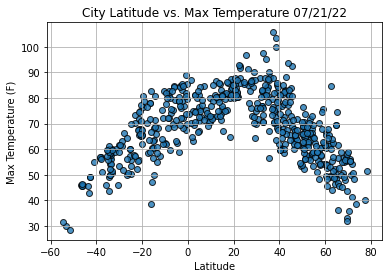

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

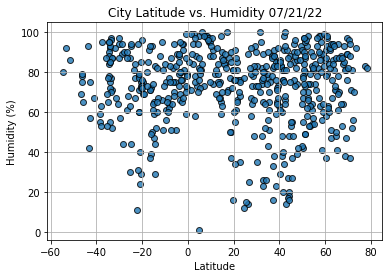

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

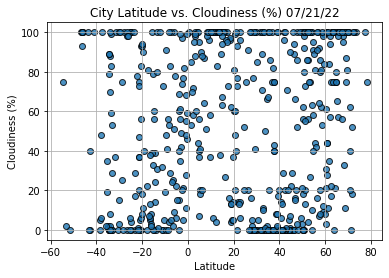

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

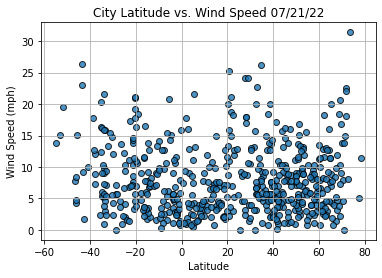

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()